# VacationPy
----

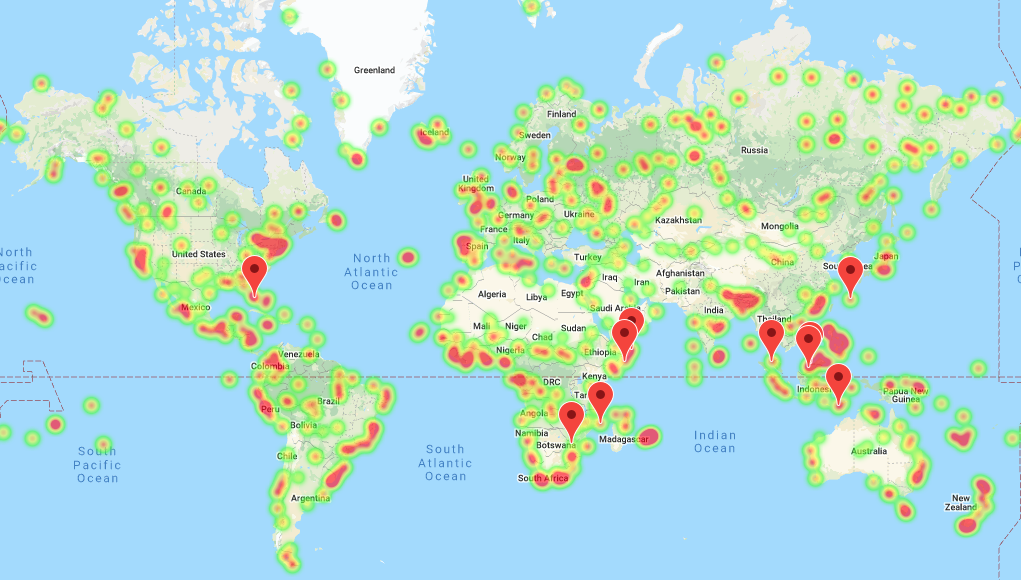

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import warnings
warnings.filterwarnings('ignore')
# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
# load city data csv
cityDataDF = pd.read_csv("Output/cityData.csv")
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,49.68,68,97,5.59,US,1635032133
1,punta arenas,-53.1500,-70.9167,35.71,87,90,27.63,CL,1635031999
2,haines junction,60.7522,-137.5108,39.15,70,71,0.00,CA,1635032068
3,maloy,61.9353,5.1136,49.73,80,100,13.00,NO,1635032146
4,saint-philippe,-21.3585,55.7679,72.99,84,58,11.81,RE,1635032014


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

# Store Lat and Lng as locations
locations = cityDataDF[["Lat","Lng"]]

# define humidity from dataFrame
humidity = cityDataDF["Humidity"]


In [4]:
# create map
humid_heatmap = gmaps.figure(center=(10, -20), zoom_level=2)

#Add heatmap layer
heat_layer = gmaps.heatmap_layer(locations, weights = humidity, dissipating=False, max_intensity=np.max(humidity), point_radius=3)

humid_heatmap.add_layer(heat_layer)
humid_heatmap

Figure(layout=FigureLayout(height='420px'))

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [5]:
# Create dataFrame of cities with my ideal weather conditions 
# Max Temperature  between 72-85
# wind speed below 10
# cloudiness  between 20-30%

idealWeatherDF = cityDataDF.loc[(cityDataDF["Max Temp"] >= 72) & (cityDataDF["Max Temp"] <= 85)\
                & (cityDataDF["Wind Speed"] <= 10) & (cityDataDF["Cloudiness"]>= 20) & (cityDataDF["Cloudiness"]<= 30)].dropna()
idealWeatherDF


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
53,georgetown,5.4112,100.3354,78.89,88,20,1.99,MY,1635032092
68,louis trichardt,-23.0439,29.9032,77.88,26,25,3.36,ZA,1635032204
172,hobyo,5.3505,48.5268,78.58,80,30,7.25,SO,1635032286
200,gushikawa,26.3544,127.8686,74.43,79,20,8.05,JP,1635032323
202,kupang,-10.1667,123.5833,81.18,89,20,1.14,ID,1635032325
333,lehigh acres,26.6254,-81.6248,82.38,84,20,1.01,US,1635032443
461,angoche,-16.2325,39.9086,73.58,83,30,9.93,MZ,1635032555
463,bandarbeyla,9.4942,50.8122,76.59,83,22,4.70,SO,1635032558
487,bintulu,3.1667,113.0333,75.61,94,20,5.99,MY,1635032581
553,miri,4.4148,114.0089,75.34,100,20,2.30,MY,1635032645


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [6]:
#Store into variable named hotel_df.
hotel_df = idealWeatherDF[["City","Lat","Lng", "Country"]]

In [7]:
# Add a "Hotel Name" column to the DataFrame.
hotel_df["Hotel Name"] = ""
hotel_df

,City,Lat,Lng,Country,Hotel Name
53,georgetown,5.4112,100.3354,MY,
68,louis trichardt,-23.0439,29.9032,ZA,
172,hobyo,5.3505,48.5268,SO,
200,gushikawa,26.3544,127.8686,JP,
202,kupang,-10.1667,123.5833,ID,
333,lehigh acres,26.6254,-81.6248,US,
461,angoche,-16.2325,39.9086,MZ,
463,bandarbeyla,9.4942,50.8122,SO,
487,bintulu,3.1667,113.0333,MY,
553,miri,4.4148,114.0089,MY,


In [8]:
# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"


# Set parameters to search for hotels with 5000 meters.
params = {
    "keyword": "hotel",
    "radius": 5000,
    "type": "hotel",
    "key": g_key
}

In [9]:
# Hit the Google Places API for each city's coordinates.

for index,row in hotel_df.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    city = row["City"]
    
    # add location parameter
    params["location"] = f"{lat},{lng}"
    
    print(f"Processing results for {city}...")
    response = requests.get(base_url, params=params).json()
          
    # gather hotel search results
    results = response['results']
          
# Store the first Hotel result into the DataFrame.
    try: 
        hotel_df.loc[index, "Hotel Name"] = results[0]['name']
    except:
        print(f"Could not find result for {city}.")
        pass
    

Processing results for georgetown...
Processing results for louis trichardt...
Processing results for hobyo...
Processing results for gushikawa...
Processing results for kupang...
Processing results for lehigh acres...
Processing results for angoche...
Processing results for bandarbeyla...
Processing results for bintulu...
Processing results for miri...


In [10]:
# display dataFrame with hotels updated
hotel_df

,City,Lat,Lng,Country,Hotel Name
53,georgetown,5.4112,100.3354,MY,"Eastern & Oriental Hotel, Penang"
68,louis trichardt,-23.0439,29.9032,ZA,Mountain Rose Boutique Hotel
172,hobyo,5.3505,48.5268,SO,Osmani Hotel
200,gushikawa,26.3544,127.8686,JP,Amawari Hotel
202,kupang,-10.1667,123.5833,ID,ASTON Kupang Hotel & Convention Center
333,lehigh acres,26.6254,-81.6248,US,Quality Inn & Suites Lehigh Acres Fort Myers
461,angoche,-16.2325,39.9086,MZ,Hotel Chando Angoche
463,bandarbeyla,9.4942,50.8122,SO,JABIR HOTEL
487,bintulu,3.1667,113.0333,MY,Promenade Bintulu hotel
553,miri,4.4148,114.0089,MY,Ajang Hotel


In [11]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [12]:
# Add marker layer ontop of heat map
hotel_markers = gmaps.marker_layer(locations, info_box_content = hotel_info)
humid_heatmap.add_layer(hotel_markers)

# Display figure
humid_heatmap

Figure(layout=FigureLayout(height='420px'))